<Axes: xlabel='Style'>

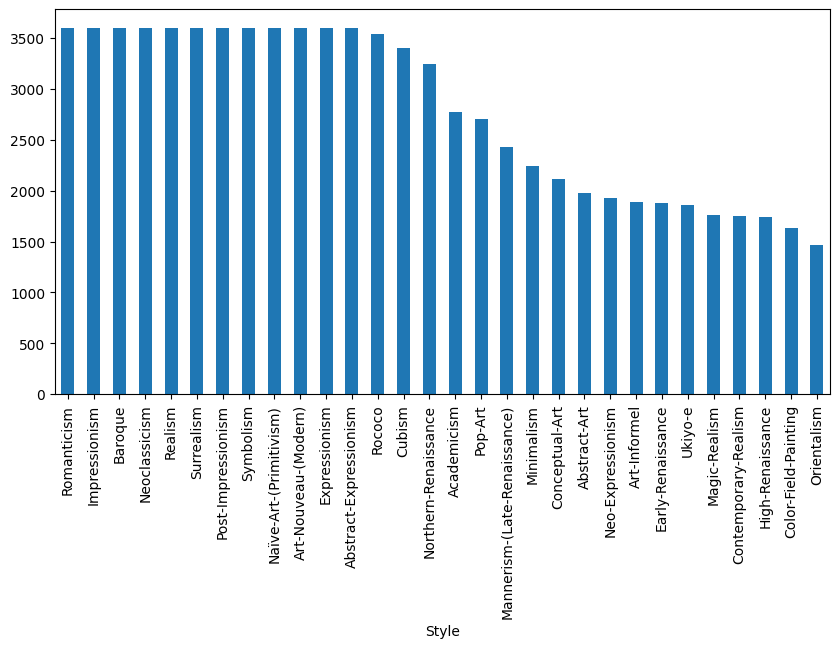

In [14]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import urllib.request

# DataFrame
wikiart = pd.read_csv('wikiart_scraped.csv')
plt.figure(figsize=(10, 5))
wikiart.Style.value_counts()[:30].plot(kind='bar')

In [15]:
imp_df = wikiart[wikiart['Style'] == 'Impressionism']
imp_df.head()

,Style,Artwork,Artist,Date,Link
53720,Impressionism,"The Lake, Petworth, Sunset; Sample Study",J.M.W. Turner,1827-1828,https://uploads4.wikiart.org/00246/images/will...
53721,Impressionism,Portrait of the Artist by Himself,Johan Jongkind,1850,https://uploads4.wikiart.org/00283/images/joha...
53722,Impressionism,Landscape at Valery-sur-Somme,Edgar Degas,1854,https://uploads2.wikiart.org/images/edgar-dega...
53723,Impressionism,Self-portrait,Edgar Degas,1854,https://uploads6.wikiart.org/images/edgar-dega...
53724,Impressionism,Self Portrait,Edgar Degas,1855,https://uploads0.wikiart.org/images/edgar-dega...


<Axes: xlabel='Artist'>

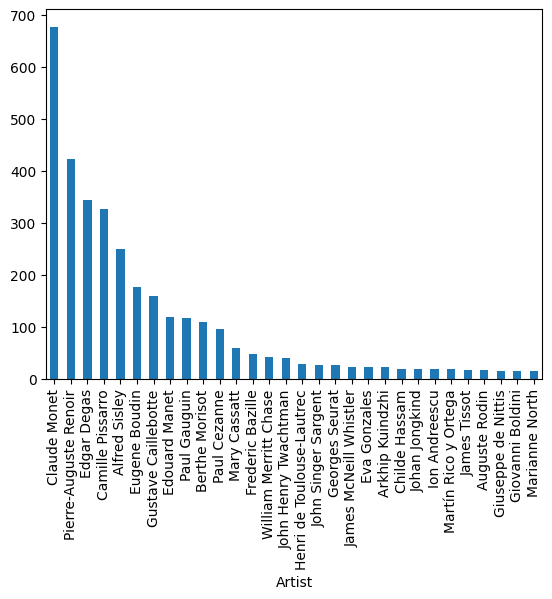

In [16]:
imp_df.Artist.value_counts()[:30].plot(kind='bar')

In [19]:
lst_artists = ['Claude Monet', 'Pierre-Auguste Renoir', 'Edgar Degas', 'Camille Pissarro', 'Alfred Sisley', 'Paul Cezanne', 'Berthe Morisot', 'Mary Cassatt', 'Gustave Caillebot']
imp_df = imp_df[(imp_df['Artist'].isin(lst_artists))]
imp_df

,Style,Artwork,Artist,Date,Link
53722,Impressionism,Landscape at Valery-sur-Somme,Edgar Degas,1854,https://uploads2.wikiart.org/images/edgar-dega...
53723,Impressionism,Self-portrait,Edgar Degas,1854,https://uploads6.wikiart.org/images/edgar-dega...
53724,Impressionism,Self Portrait,Edgar Degas,1855,https://uploads0.wikiart.org/images/edgar-dega...
53725,Impressionism,Study for the Self Portrait,Edgar Degas,1855,https://uploads5.wikiart.org/images/edgar-dega...
53726,Impressionism,Study of Gentile Bellini,Edgar Degas,1854-1855,https://uploads2.wikiart.org/images/edgar-dega...
...,...,...,...,...,...
57307,Impressionism,"Still Life, a Plate of Plums",Pierre-Auguste Renoir,1884,https://uploads1.wikiart.org/images/pierre-aug...
57308,Impressionism,Vase of Flowers,Pierre-Auguste Renoir,1884,https://uploads7.wikiart.org/images/pierre-aug...
57309,Impressionism,Vase of Roses and Dahlias,Pierre-Auguste Renoir,1883-1884,https://uploads4.wikiart.org/images/pierre-aug...
57310,Impressionism,Young Girl in a Straw Hat,Pierre-Auguste Renoir,1884,https://uploads8.wikiart.org/images/pierre-aug...


In [22]:
# do not take self-portraits
imp_df = imp_df[imp_df['Artwork'].str.lower().str.contains('self portrait') == False]
imp_df

,Style,Artwork,Artist,Date,Link
53722,Impressionism,Landscape at Valery-sur-Somme,Edgar Degas,1854,https://uploads2.wikiart.org/images/edgar-dega...
53726,Impressionism,Study of Gentile Bellini,Edgar Degas,1854-1855,https://uploads2.wikiart.org/images/edgar-dega...
53727,Impressionism,The Millinery Shop,Edgar Degas,1855,https://uploads2.wikiart.org/00224/images/edga...
53728,Impressionism,Degas in a Green Jacket,Edgar Degas,1855-1856,https://uploads1.wikiart.org/images/edgar-dega...
53729,Impressionism,Portrait of an Italian,Edgar Degas,1856,https://uploads0.wikiart.org/images/edgar-dega...
...,...,...,...,...,...
57307,Impressionism,"Still Life, a Plate of Plums",Pierre-Auguste Renoir,1884,https://uploads1.wikiart.org/images/pierre-aug...
57308,Impressionism,Vase of Flowers,Pierre-Auguste Renoir,1884,https://uploads7.wikiart.org/images/pierre-aug...
57309,Impressionism,Vase of Roses and Dahlias,Pierre-Auguste Renoir,1883-1884,https://uploads4.wikiart.org/images/pierre-aug...
57310,Impressionism,Young Girl in a Straw Hat,Pierre-Auguste Renoir,1884,https://uploads8.wikiart.org/images/pierre-aug...


<Axes: xlabel='Artwork'>

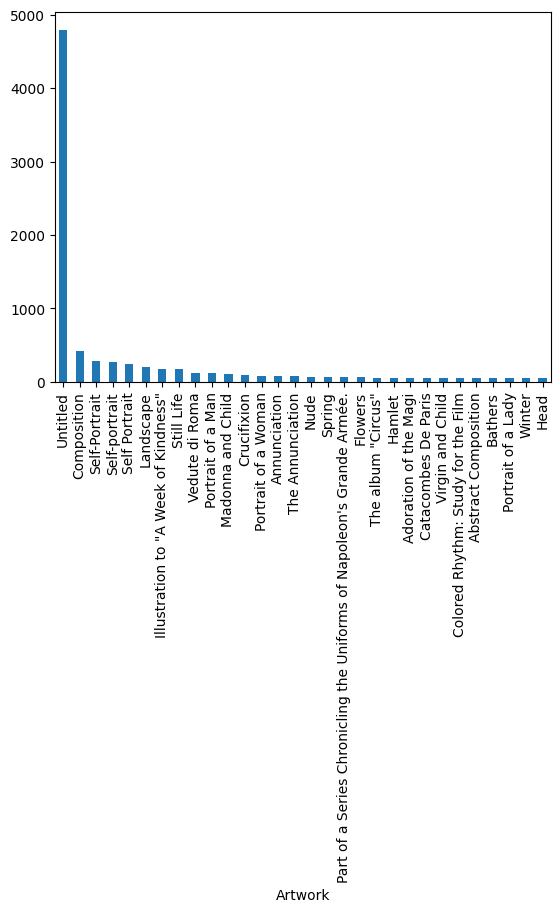

In [23]:
wikiart['Artwork'].value_counts()[:30].plot(kind='bar')

In [9]:
portrait_df = wikiart[wikiart['Artwork'] == 'Self Portrait']
portrait_df

,Style,Artwork,Artist,Date,Link
3129,Early-Renaissance,Self Portrait,Leon Battista Alberti,1435,https://uploads3.wikiart.org/00246/images/leon...
5034,High-Renaissance,Self Portrait,Raphael,1499,https://uploads0.wikiart.org/images/raphael/se...
5064,High-Renaissance,Self Portrait,Pietro Perugino,1496-1500,https://uploads4.wikiart.org/images/pietro-per...
5356,High-Renaissance,Self Portrait,Leonardo da Vinci,1505,https://uploads8.wikiart.org/00323/images/leon...
5370,High-Renaissance,Self Portrait,Raphael,1506,https://uploads2.wikiart.org/images/raphael/se...
...,...,...,...,...,...
114487,Transavantgarde,Self Portrait,Alexander Roitburd,2010,https://uploads5.wikiart.org/00155/images/alex...
116408,Street-art,Self Portrait,Jean-Michel Basquiat,1986,https://uploads0.wikiart.org/images/jean-miche...
117561,Fantasy-Art,Self Portrait,Lisa Yuskavage,2017,https://uploads8.wikiart.org/00309/images/lisa...
118393,Classical-Realism,Self Portrait,Antonio Bueno,1948,https://uploads8.wikiart.org/00319/images/anto...


In [24]:
# # write in a txt file imp_df.Artwork.unique()
with open("impressionism_artworks.txt", "w") as file:
    file.write("\n".join(imp_df.Artwork.unique()))

In [25]:
import os
import requests

# Create the directory if it doesn't exist
os.makedirs('impressionism', exist_ok=True)

# User-Agent to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Loop over each image URL in the DataFrame
for i, url in enumerate(imp_df['Link']):
    print(f"Attempting to download image from {url}...")
    try:
        # Send a GET request to the URL with the custom headers
        response = requests.get(url, headers=headers)
        
        # Check if the response is valid (status code 200) and contains an image
        if response.status_code == 200 and 'image' in response.headers['Content-Type']:
            with open(f'impressionism/{i}.jpg', 'wb') as f:
                f.write(response.content)
            print(f"Successfully downloaded image {i}")
        else:
            print(f"Failed to retrieve {url} with status code {response.status_code}")
    except Exception as e:
        print(f"Error with {url}: {e}")
        continue


Attempting to download image from https://uploads2.wikiart.org/images/edgar-degas/landscape-at-valery-sur-somme.jpg...
Successfully downloaded image 0
Attempting to download image from https://uploads2.wikiart.org/images/edgar-degas/study-of-gentile-bellini-1855.jpg...
Successfully downloaded image 1
Attempting to download image from https://uploads2.wikiart.org/00224/images/edgar-degas/edgar-germain-hilaire-degas-011.jpg...
Successfully downloaded image 2
Attempting to download image from https://uploads1.wikiart.org/images/edgar-degas/degas-in-a-green-jacket-1856.jpg...
Successfully downloaded image 3
Attempting to download image from https://uploads0.wikiart.org/images/edgar-degas/portrait-of-an-italian-1856.jpg...
Successfully downloaded image 4
Attempting to download image from https://uploads8.wikiart.org/images/edgar-degas/woman-on-a-terrace-young-woman-and-ibis-1857.jpg...
Successfully downloaded image 5
Attempting to download image from https://uploads0.wikiart.org/images/edga